In [52]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(0.835, 0.985)

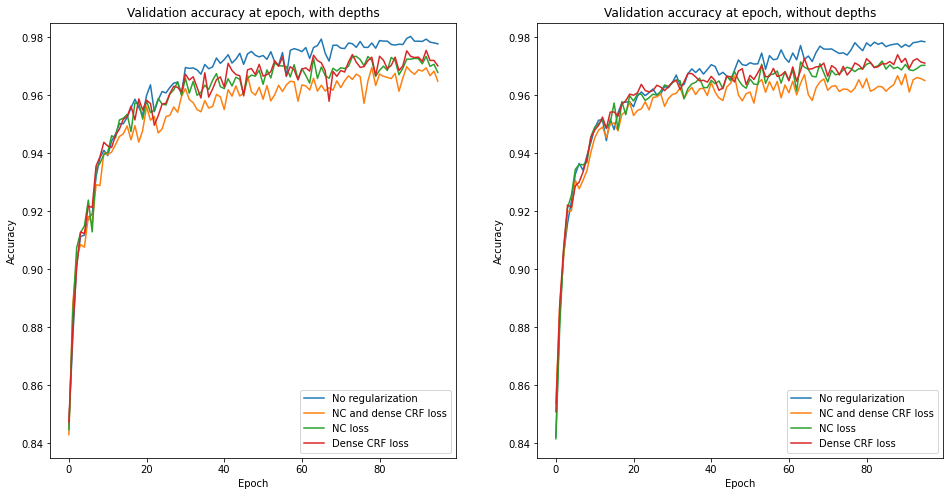

In [58]:
base_dir = '/playpen/Downloads/'

runs = [
    (4, 'lucille', 0, 0),
    (2, 'marjorie', 1, 1),
    (3, 'bertie', 0, 1),
    (1, 'richard', 1, 0),
    (0, 'cyrus', 0, 0),
    (1, 'erwin', 1, 1),
    (2, 'sal', 0, 1),
    (3, 'celia', 1, 0),
]

dfs = []
for i, rname, dc, nc in runs:
    filename = os.path.join(base_dir, f'run-ex_{i}_{rname}-tag-val_Acc.csv')
    df = pd.read_csv(filename, sep=',', header=0)
    df['Step'] += 1
    dfs.append(df)

plt.subplots(1, 2, figsize=(16,8))
plt.subplot(121)
for i, df in enumerate(dfs):
    if i==4:
        plt.title('Validation accuracy at epoch, with depths')
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.835, 0.985])
        plt.subplot(122)
    tag = runs[i][2]*2 + runs[i][3]
    if tag==0:
        label='No regularization'
    elif tag==1:
        label = "NC loss"
    elif tag==2:
        label = "Dense CRF loss"
    else:
        label = "NC and dense CRF loss"
    df['Value'].plot(label=label)
plt.title('Validation accuracy at epoch, without depths')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.835, 0.985])


Text(0, 0.5, 'Accuracy')

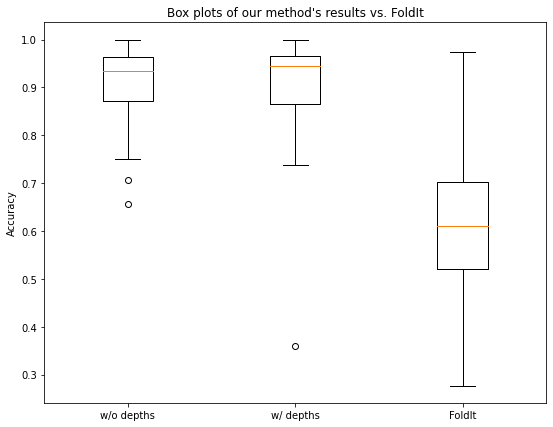

In [61]:
accs3 = np.load('run/pascal/mobilenet3-96/ex_0_cyrus/my_accs.npy')
accs4 = np.load('run/pascal/mobilenet4-96/ex_4_lucille/my_accs.npy')
fi_accs = np.load('run/pascal/mobilenet3-96/ex_0_cyrus/fi_accs.npy')
plt.figure(figsize=(9,7))
plt.boxplot([accs3, accs4, fi_accs], labels=['w/o depths', 'w/ depths', 'FoldIt'])
# plt.violinplot([accs3, accs4, fi_accs])
plt.title('Box plots of our method\'s results vs. FoldIt')
plt.ylabel('Accuracy')